# Menghitung Harga Jual Mobil Bekas Pak Mukidi


Suatu hari, Pak Mukidi ingin menjual mobilnya yang sudah lama tidak dipakai. Agar cepat terjual dan tidak mengalami kerugian yg banyak, maka harga jual mobil tidak boleh terlalu mahal maupun terlalu murah. Maka dari itu, Pak Mukidi meminta bantuan kita untuk menentukan harga jual yang cocok untuk mobil tersebut. Kita diberikan suatu data set penjualan mobil (file cars_data.csv). Data set ini dapat digunakan untuk menentukan harga jual mobil Pak Mukidi yang cocok.


Terdapat tiga unsur utama pada dataset ini, yaitu:

* Spesifikasi dari suatu mobil, dalam hal ini adalah jenis karakteristiknya (fuel-type, num-of-doors, body-style, dll).
* Symbolling adalah nilai rating dari insurance risk pada setiap mobil. Besarnya nilai rating sesuai dengan sejauh mana mobil lebih berisiko dibanding harga yang ditunjukkan. Nilai +3 mengindikasikan bahwa mobil tersebut sangat berisiko, sebaliknya -3 berarti sangat aman.
* Normalized-loss merepresentasikan rata-rata kerugian/loss dari mobil yang diasuransikan per tahunnya. Nilai tersebut sudah dinormalisasi, sehingga berkisar antara 65 hingga 256.


Untuk dapat menganalisa data dan mengaplikasikan model machine learning, maka kita harus melakukan pembersihan data terlebih dahulu:

* Import data pada Jupyter Notebook (Google Colab) dan tampilkan 20 data awal pada dataframe
* Kolom/atribut mana saja yang mengandung missing value (i.e NaN)
* Ubah missing value pada setiap kolomnya (step 2) menjadi nol (0)
* Ubah tipe data horsepower menjadi integer


Jika data sudah bersih, maka selanjutnya dapat mengaplikasikan model machine learning pada data set.

Untuk mengetahui fitur-fitur apa saja yang mempengaruhi harga mobil, maka lakukan:

* Plot highway-mpg VS price menggunakan scatter plot
* Plot horse-power VS price menggunakan scatter plot
* Plot curb-weight VS price menggunakan scatter plot

Lakukan train-test-split menggunakan tiga fitur pada step 1, di mana output/keluarannya adalah harga mobil

Setelah memisahkan data training dengan data test, prediksi data dengan cara:

* Gunakan model machine learning (e.g. regresi linear)
* Berapa akurasi prediksi dari model machine learning yang dihasilkan? (semakin besar akurasi yang didapat, semakin besar point Anda). Hint: jika perlu, lakukan normalisasi data, atur parameter model, dll.

Jika spesifikasi mobil milik Mukidi adalah seperti berikut: highway-mpg = 32, curb-weight = 2328, horse-power = 85, maka, berdasarkan model machine learning yang telah kita buat, berapa harga jual mobil Pak Mukidi?


In [1]:
# import library yang diperlukan

import pandas as pd
import numpy as np


In [3]:
# Import data (file "cars_data.csv") dan tampilkan 30 data awal (pertama) dari 201 baris data

df_mobil_ori = pd.read_csv("cars_data.csv")
# df_mobil_ori
df_mobil_ori.head(20)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430


In [4]:
# Kolom/atribut yang mengandung missing value (NaN)

# df_mobil_ori.isnull()
df_mobil_ori.isnull().sum()


symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [5]:
# Ubah missing value pada setiap kolomnya dengan 0 (nol)

df_mobil = df_mobil_ori.replace(np.nan,0)
df_mobil.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
# Ubah tipe data "horsepower" dari float64 ke integer64

# melihat type data setiap kolom
df_mobil.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [8]:
# ganti kolom "horsepower" dari float64 ke int64

df_mobil['horsepower'] = df_mobil['horsepower'].astype("int64")
df_mobil.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [9]:
# Masih ada tanda lain
# Ubah tanda ? ke nilai 0

df_mobil['price'] = df_mobil['price'].replace(to_replace ="?",value =0) #replace ? jadi 0
df_mobil['horsepower'] = df_mobil['horsepower'].replace(to_replace ="?",value =0) #replace ? jadi 0
df_mobil['curb-weight'] = df_mobil['curb-weight'].replace(to_replace ="?",value =0) #replace ? jadi 0
df_mobil['highway-mpg'] = df_mobil['highway-mpg'].replace(to_replace ="?",value =0) #replace ? jadi 0
df_mobil.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,0.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


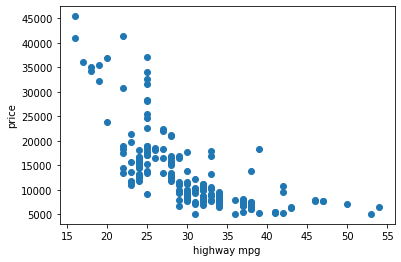

In [12]:
# Plot highway-mpg vs price pada scatter plot

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.scatter(df_mobil['highway-mpg'], df_mobil['price'])
plt.xlabel("highway mpg")
plt.ylabel("price")
plt.show()


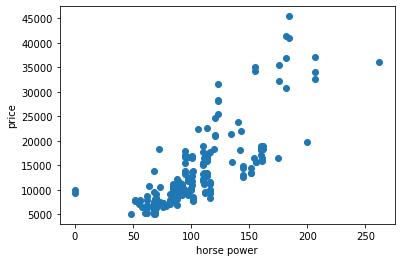

In [13]:
# Plot horse power vs price pada scatter plot

plt.scatter(df_mobil['horsepower'], df_mobil['price'])
plt.xlabel("horse power")
plt.ylabel("price")
plt.show()

# terlihat ada data outliers (menyimpang) di bagian paling kanan dan kiri


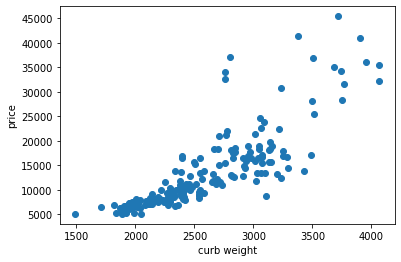

In [14]:
# Plot curb wight vs price pada scatter plot

plt.scatter(df_mobil['curb-weight'], df_mobil['price'])
plt.xlabel("curb weight")
plt.ylabel("price")
plt.show()


Langkah selanjutnya adalah melakukan split dataset menjadi data training 80% dan data testing 20%

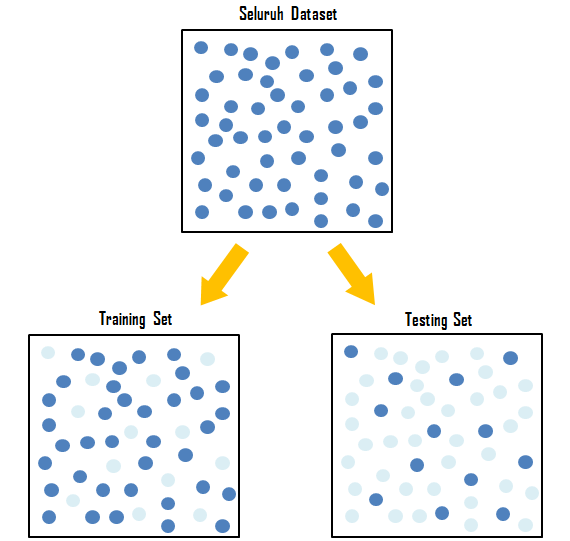

In [15]:
# Melakukan train-test-split pada 3 fitur (kolom) data diatas

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_mobil[['highway-mpg','curb-weight','horsepower']]
y = df_mobil[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
# Prediksi data dengan model machine learning (i.e. regresi linear)
# Membuat model

from sklearn.metrics import r2_score, mean_squared_error

model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)
model_regresi_pred = model_regresi.predict(X_test)
# model_regresi_pred


In [17]:
print(model_regresi_pred[3])  # hasil prediksi
print(y.iloc[3])              # data price Ground Truth/acuan/data asli


[15532.5165394]
price    13950
Name: 3, dtype: int64


Formula MSE

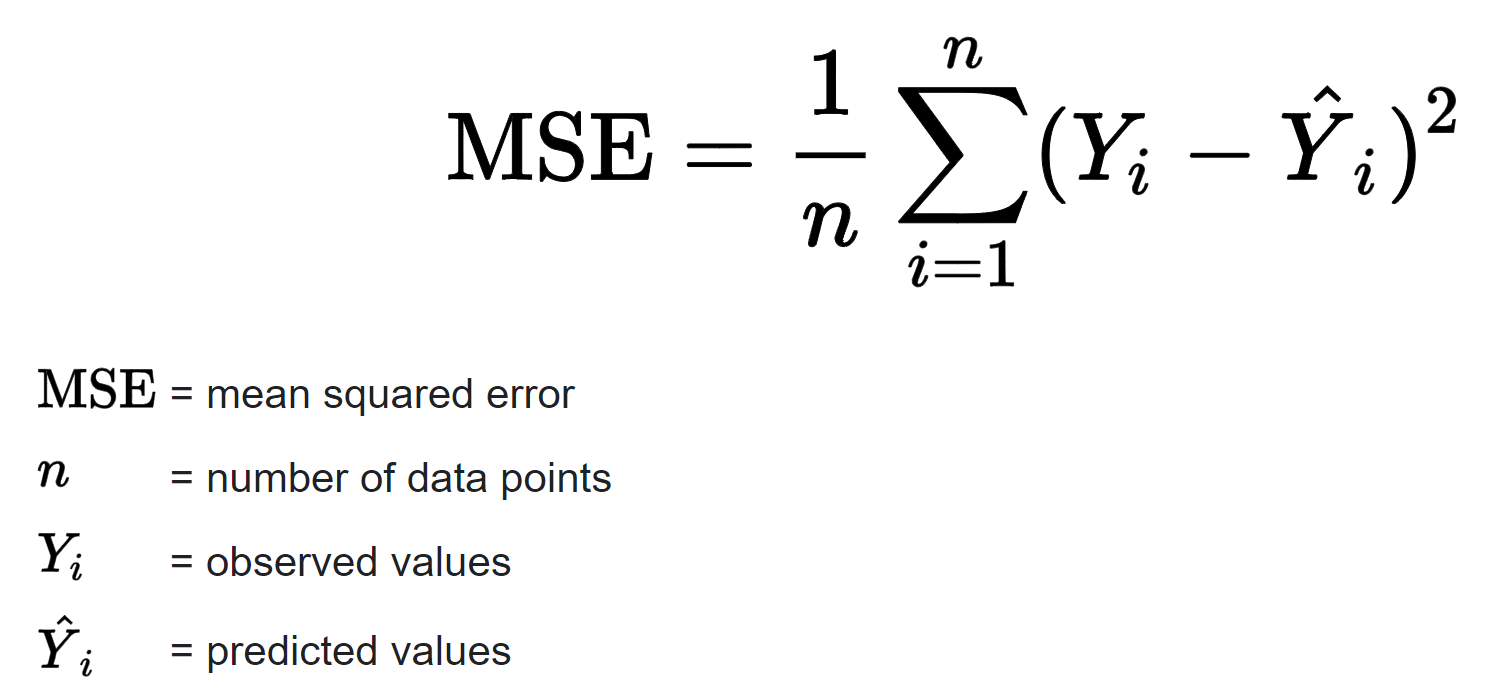

In [19]:
# Menghitung MSE (Mean Square Error)
# Dikuadratkan supaya tidak ada nilai minus (-)
# Nanti hasilnya di-akar kuadrat

mse = str(mean_squared_error(y_test, model_regresi_pred))
print("MSE: " + mse)

# print("MSE: "+ str(mean_squared_error(y_test, model_regresi_pred)))


MSE: 14355377.576900974


In [20]:
# Menghitung RMSE (Root Mean Square)

akar = str(r2_score(model_regresi_pred, y_test))
print("R2: " + akar)

# print("R2: "+ str(r2_score(model_regresi_pred, y_test)))


R2: 0.7720366795594247


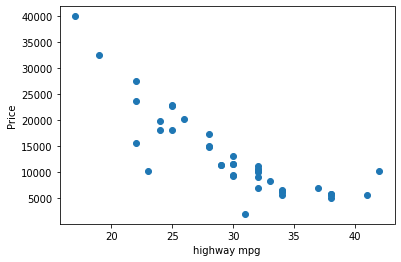

In [21]:
# Memasukkan data test kedalam model

plt.scatter(X_test.iloc[:,0], model_regresi_pred)
plt.xlabel("highway mpg")
plt.ylabel("Price")
plt.show()


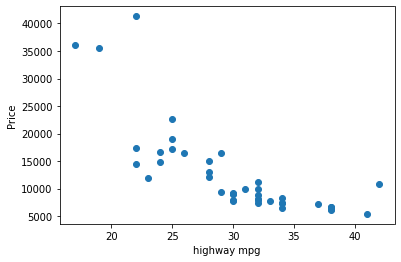

In [22]:
# Menampilkan plot data test

plt.scatter(X_test.iloc[:,0], y_test)
plt.xlabel("highway mpg")
plt.ylabel("Price")
plt.show()


In [23]:
# Spesifikasi mobil Mukidi (highway-mpg = 32; curb-wight = 2328; horse-power = 85)
# Berapa harga jual mobil Mukidi

mukidi = ([[32, 2328,   85]])
mukidi


[[32, 2328, 85]]

In [24]:
model_regresi_pred = model_regresi.predict(mukidi)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
model_regresi_pred


array([[9636.7646999]])

Berdasarkan prediksi model, didapat harga jual mobil Mukidi adalah ... lihat hasil `model_regresi_pred`
